**ДР к Л2**

---
Вводные переменные:
*   Стаж 
*   Род занятий
*   Вес выборки/количество представителей
*   Образование
*   Длительность обучения 
*   Семейное положение
*   Профессия
*   Отношения
*   Раса
*   Пол
*   Капитальная прибыль
*   Капительный убыток
*   Кол-во часов работы/неделя
*   Страна происхождения

Таргетная переменная: доход















In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/stfilimonova/feml/master/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


Обработка данных

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

category = df.select_dtypes(include=['object'])
category_list = [x for x in category.columns]
category_list.remove('class')
for x in range(len(category_list)):
    c = category_list[x]
    print(c,len(df[pd.isnull(df[c])]))

workclass 2799
education 0
marital-status 0
occupation 2809
relationship 0
race 0
sex 0
native-country 857


In [4]:
df = df[pd.isnull(df['workclass']) == 0 ]
df = df[pd.isnull(df['occupation']) == 0 ]
df = df[pd.isnull(df['native-country']) == 0 ]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capitalgain     45222 non-null  int64 
 11  capitalloss     45222 non-null  int64 
 12  hoursperweek    45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  class           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [5]:
df['class'].value_counts()

<=50K    34014
>50K     11208
Name: class, dtype: int64

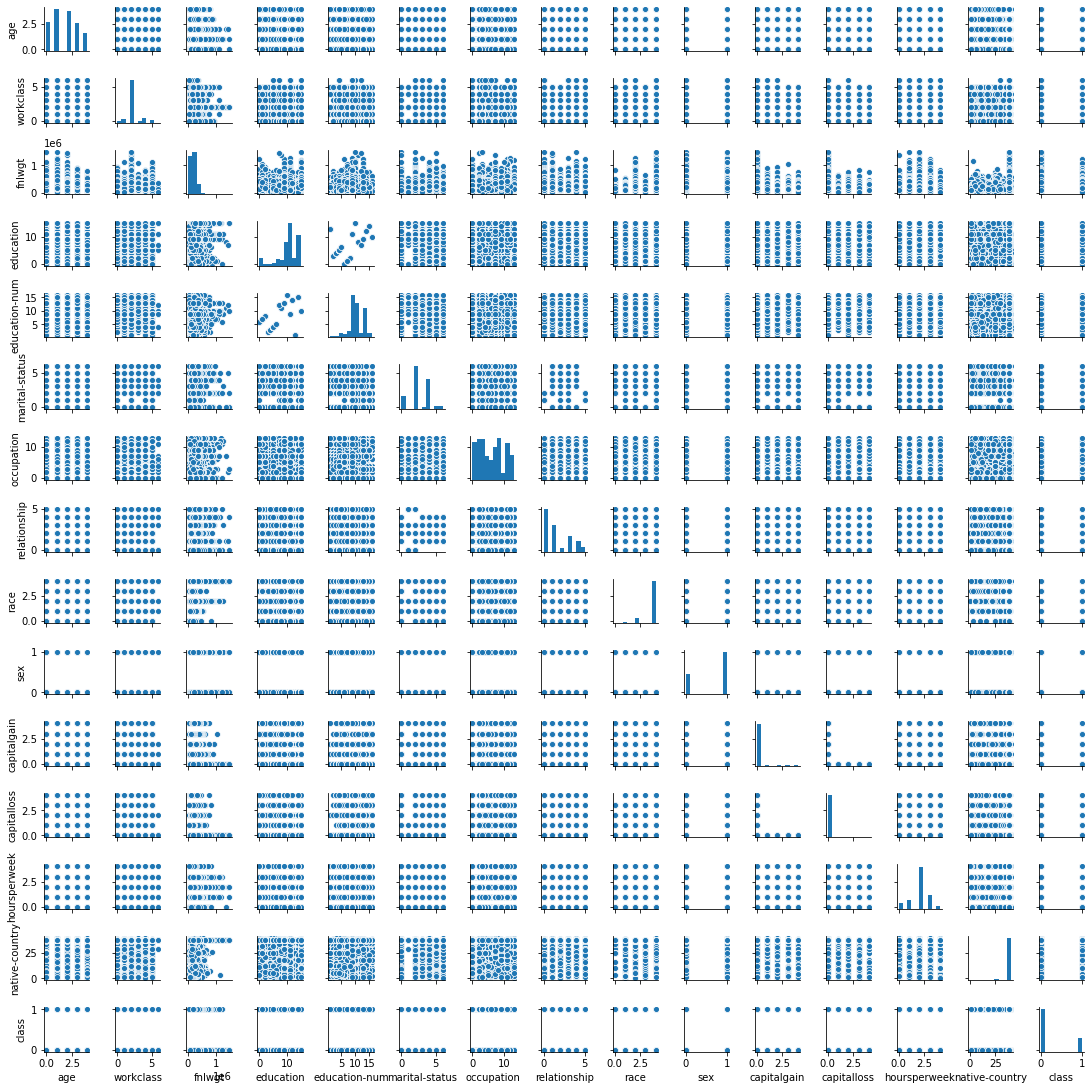

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for x  in df.select_dtypes(include=['object']):
    df[x]=le.fit_transform(df[x])
    
sns.pairplot(df, height=1)

education-num и education, а так же capitalgain и capitalloss коррелированы, поэтому используем только education и capitalgain

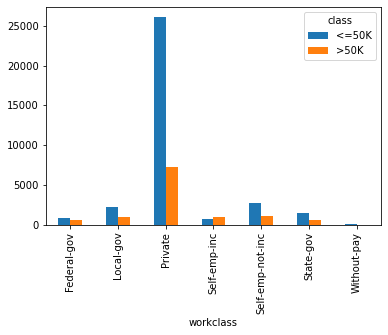

In [6]:
%matplotlib inline

pd.crosstab(df['workclass'],df['class']).plot(kind='bar')

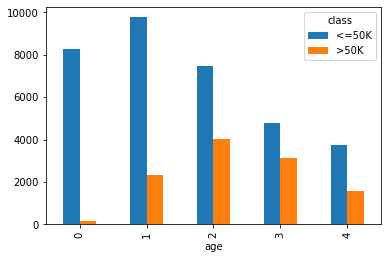

In [7]:
pd.crosstab(df['age'],df['class']).plot(kind='bar')

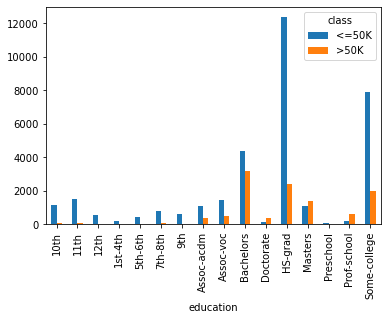

In [8]:
pd.crosstab(df['education'],df['class']).plot(kind='bar')

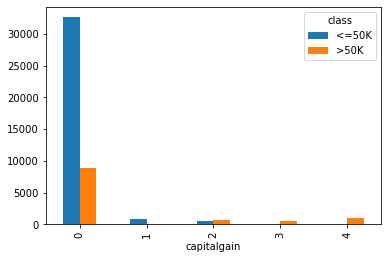

In [9]:
pd.crosstab(df['capitalgain'],df['class']).plot(kind='bar')

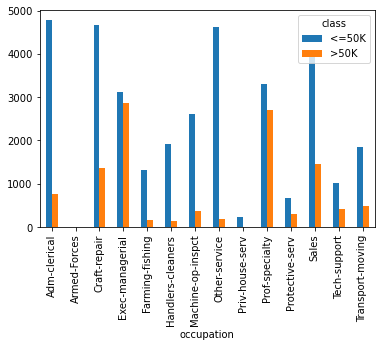

In [10]:
pd.crosstab(df['occupation'],df['class']).plot(kind='bar')

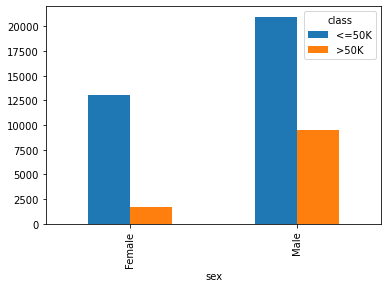

In [11]:
pd.crosstab(df['sex'],df['class']).plot(kind='bar')

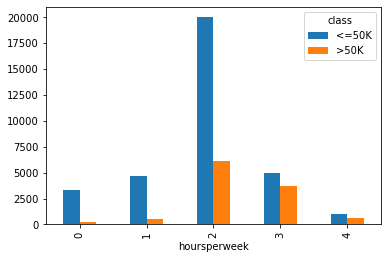

In [12]:
pd.crosstab(df['hoursperweek'],df['class']).plot(kind='bar')

Модель логистической регрессии

In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split


X = pd.get_dummies(df[['workclass','occupation','education']])

le = LabelEncoder()
le.fit(df['class'])
y = le.transform(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [82]:
model_lg = LogisticRegression(max_iter=1500)
model_lg.fit(X_train, y_train)
model_lg.score(X_test,y_test)

0.7844770398761701

Модель svm


In [86]:
model_svc = make_pipeline(StandardScaler(), SVC())
model_svc.fit(X_train, y_train)
model_svc.score(X_test, y_test)

0.7836662489865114